In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

In [63]:
casia_mean_conv2d_results = pd.read_csv("/home/ivan/pascal_adversarial_faces/results/recall_at_1_mean_casia-webface_vggface2.csv")

In [64]:
casia_mean_conv2d_results[casia_mean_conv2d_results.decoys_vs_clean < 0].decoys_vs_clean = 0

/home/ivan/anaconda3/envs/facenet-gpu-112/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
casia_mean_conv2d_results.loc[casia_mean_conv2d_results.decoys_vs_clean < 0, "decoys_vs_clean"] = 0.0

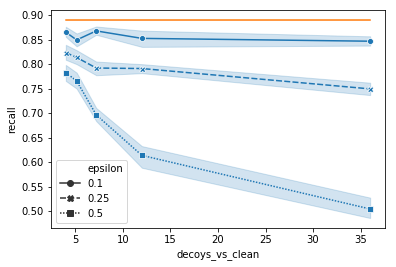

In [66]:
nonzero_subset = casia_mean_conv2d_results[casia_mean_conv2d_results.decoys_vs_clean > 0.0]
fig = sns.lineplot(
        data=nonzero_subset, x="decoys_vs_clean", y="recall", style="epsilon", markers=True)
stuff = range(
    int(pd.Series(casia_mean_conv2d_results["decoys_vs_clean"].unique()).nsmallest(2).iloc[-1]), 
    int(casia_mean_conv2d_results["decoys_vs_clean"].max()+1)
)
mean_stuff = [np.mean(casia_mean_conv2d_results[casia_mean_conv2d_results.decoys_vs_clean == 0]["recall"]) for i in stuff]
fig.plot(
    stuff,
    mean_stuff
)
y = casia_mean_conv2d_results[casia_mean_conv2d_results.decoys_vs_clean == 0]["recall"]
ci = np.std(y)
fig.fill_between(
     stuff,
    (mean_stuff-ci), (mean_stuff+ci), color='r', alpha=.1)

In [34]:
np.linspace(
        int(casia_mean_conv2d_results["decoys_vs_clean"].min()), 
        int(casia_mean_conv2d_results["decoys_vs_clean"].max()),
        len(y))

In [31]:
print(y.shape)

(10,)


In [47]:
int(casia_mean_conv2d_results["decoys_vs_clean"].nsmallest(2)[-1])

0

In [57]:
pd.Series(casia_mean_conv2d_results["decoys_vs_clean"].unique()).nsmallest(2).iloc[-1]

4.0

In [95]:
def draw_results(results):
    nonzero_subset = results[results.decoys_vs_clean > 0]
    
    ### Draw the cases with decoys as a function of the proportion of decoys to clean images
    fig = sns.lineplot(
        data=nonzero_subset, x="decoys_vs_clean", y="recall", style="epsilon", markers=True)

    ### Draw the epsilon=0.0/no decoys case as a straight line with a confidence interval
    # determine the range of the x axis (decoys_vs_clean), for the matplotlib plot function
    min_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.min())
    max_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.max())
    x_range = range(min_decoys_vs_clean, max_decoys_vs_clean + 1)
    
    # determine the mean recall of the epsilon = 0.0 subset
    mean_clean_recall = np.mean(results[results.decoys_vs_clean <= 0.0]["recall"])
    # repeat it for the x range so that it gets drawn as a straight line
    y_mean = [mean_clean_recall for _ in x_range]
    
    # determine the 95% confidence interval
    std_clean_recall = np.std(results[results.decoys_vs_clean <= 0.0]["recall"])
    n_clean_recall = len(results[results.decoys_vs_clean <= 0.0]["recall"])
    confidence_bound = 1.96 * (std_clean_recall/np.sqrt(n_clean_recall))

    # fill the confidence interval for the range
    fig.plot(
        x_range,
        y_mean,
        color='r'
    )
    fig.fill_between(
        x_range,
        (y_mean - confidence_bound), 
        (y_mean + confidence_bound), 
        color='r',
        alpha=.1
    )

def get_path(network_to_evaluate, attack_name):
    return "/home/ivan/pascal_adversarial_faces/results/recall_at_1_{attack_name}_{network_to_evaluate}.csv".format(
        network_to_evaluate=network_to_evaluate,
        attack_name=attack_name
    )

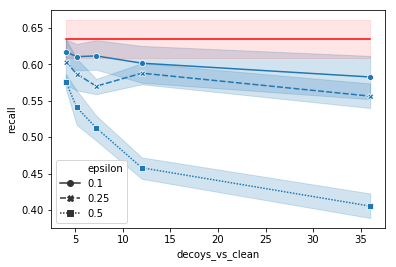

In [96]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_Conv2d_4b_3x3_casia-webface")))

In [ ]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_Conv2d_4b_3x3_casia-webface")))